### Import all the necessary libraries.

In [1]:
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras import layers
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Load the data sets and display one image.

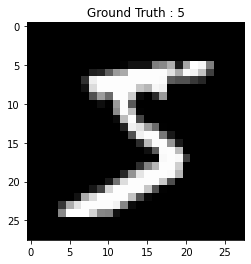

In [2]:
# Load the mnist data into train and test images.
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

### Reshape the data.

In [3]:
# convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

### Scale the data.

In [4]:
# convert data to float and scale values between 0 and 1
train_data=train_data.astype('float')
test_data=test_data.astype('float')

# scale data
train_data/=255.0
test_data/=255.0

### One-hot encoding.

In [5]:
# change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

### Build the model.

In [6]:
# creating network
model = keras.Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2735 - accuracy: 0.9146 - val_loss: 0.1156 - val_accuracy: 0.9636
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0915 - accuracy: 0.9719 - val_loss: 0.1008 - val_accuracy: 0.9708
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0936 - val_accuracy: 0.9719
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0694 - val_accuracy: 0.9811
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0645 - val_accuracy: 0.9825
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0751 - val_accuracy: 0.9809
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0774 - val_accuracy: 0.9813
Epoc

### Evaluation: 
#### Loss = 0.1318, Accuracy = 0.9828

In [7]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1282 - accuracy: 0.9832
Evaluation result on Test Data : Loss = 0.1282305121421814, accuracy = 0.9832000136375427


Inference on the model

[7]


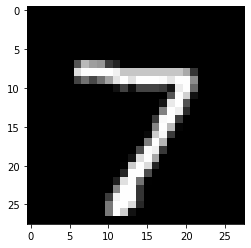

In [8]:
print(np.argmax(model.predict(test_data[[0],:]),axis = -1))
plt.imshow(test_images[0,:,:],cmap='gray')

## 1. Change the number of hidden layers and the activation to tanh or elu and report if accuracy changes.

### The number of layers used are 4 including 1 input and output layer and 2 hidden layers.

### Using relu activation function:
313/313 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.9841
Evaluation result on Test Data : Loss = 0.1335371881723404, accuracy = 0.9840999841690063

### Using tanh activation function:
313/313 [==============================] - 2s 7ms/step - loss: 2.3109 - accuracy: 0.1008
Evaluation result on Test Data : Loss = 2.310920000076294, accuracy = 0.10080000013113022

### Build the model

In [9]:
model1 = keras.Sequential()

# Input Layer with tahn activation function
model1.add(Dense(512, activation='tanh', input_shape=(dimData,)))

# Hidden Layer with tahn activation function
model1.add(Dense(512, activation='tanh'))  #Hidden Layer I
model1.add(Dense(512, activation='tanh'))  #Hidden Layer II

# Output Layer with tahn activation function
model1.add(Dense(10, activation='softmax'))

# Compiling the model with rmsprop optimizer and categorical crossentropy loss function
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data(train/validate model)
history1 = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.1620 - val_accuracy: 0.9792
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1840 - val_accuracy: 0.9784
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1544 - val_accuracy: 0.9821
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.1405 - val_accuracy: 0.9829
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.1557 - val_accuracy: 0.9841
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1592 - val_accuracy: 0.9847
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1480 - val_accuracy: 0.9842
Epoc

### Evaluate the model

In [10]:
# Comparing test data and test labels using evaluate method
[test_loss, test_acc] = model1.evaluate(test_data, test_labels_one_hot)

# Display the loss and the accuracy
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 2.3231 - accuracy: 0.1467
Evaluation result on Test Data : Loss = 2.323124885559082, accuracy = 0.14669999480247498


### Predict the class
#### Jupyter doesn't support predict method so used numpy method to predict the class

[4]


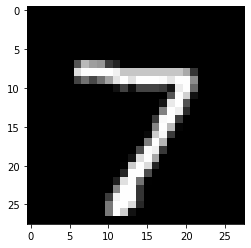

In [11]:
# prediction of class for the first image in the test data
print(np.argmax(model1.predict(test_data[[0],:]),axis = -1))

# Displaying the first image in the test data
plt.imshow(test_images[0,:,:],cmap='gray')

## 2. Using the history object in the source code, plot the loss and accuracy for both training data and validation data on the same graph.

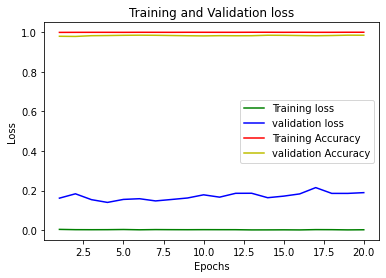

In [12]:
# From model fit epoch outputs, get all the values.
loss_train = history1.history['loss'] 
loss_test = history1.history['val_loss']
acc_train = history1.history['accuracy']
acc_test = history1.history['val_accuracy']

# Range of total number of epochs.
epochs = range(1,21)

# Training loss is labled and the graph is shown in green color.
plt.plot(epochs, loss_train, 'g', label='Training loss')

# Validation loss is labled and the graph is shown in blue color.
plt.plot(epochs, loss_test, 'b', label='validation loss')

# Training accuracy is labled and the graph is shown in red color
plt.plot(epochs, acc_train, 'r', label='Training Accuracy')

# Validation accuracy is labled and the graph is shown in yellow color.
plt.plot(epochs, acc_test, 'y', label='validation Accuracy')

# Label the graph.
# Title.
plt.title('Training and Validation loss')

# x-axis.
plt.xlabel('Epochs')

# y-axis.
plt.ylabel('Loss')

# Show dimensions(describes each line is showing what).
plt.legend()

# Display the graph.
plt.show()

## 3. Run the same code without scaling (normalizing) the images, how does the accuracy change or the model training (stable/unstable, ...)
Output:
313/313 [==============================] - 1s 3ms/step - loss: 0.5421 - accuracy: 0.9750 Evaluation result on Test Data : Loss = 0.5420658588409424, accuracy = 0.9750000238418579

In [13]:
# convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data1 = train_images.reshape(train_images.shape[0],dimData)
test_data1 = test_images.reshape(test_images.shape[0],dimData)

# convert data to float and scale values between 0 and 1
train_data1=train_data1.astype('float')
test_data1=test_data1.astype('float')

# change the labels from integer to one-hot encoding
train_labels_one_hot1 = to_categorical(train_labels)
test_labels_one_hot1 = to_categorical(test_labels)

# creating network
model2 = keras.Sequential()
model2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model2.fit(train_data1, train_labels_one_hot1, batch_size=256, epochs=20, verbose=1,validation_data=(test_data1, test_labels_one_hot1))

Epoch 1/20
235/235 [==============================] - 2s 9ms/step - loss: 5.7502 - accuracy: 0.8787 - val_loss: 0.6265 - val_accuracy: 0.9356
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.4322 - accuracy: 0.9463 - val_loss: 0.3896 - val_accuracy: 0.9402
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.2424 - accuracy: 0.9592 - val_loss: 0.4132 - val_accuracy: 0.9355
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1914 - accuracy: 0.9672 - val_loss: 0.2592 - val_accuracy: 0.9567
Epoch 5/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1672 - accuracy: 0.9709 - val_loss: 0.2827 - val_accuracy: 0.9575
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1551 - accuracy: 0.9746 - val_loss: 0.3723 - val_accuracy: 0.9603
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1474 - accuracy: 0.9776 - val_loss: 0.3552 - val_accuracy: 0.9657
E

### Evaluate the model.

In [14]:
[test_loss, test_acc] = model2.evaluate(test_data1, test_labels_one_hot1)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.5494 - accuracy: 0.9779
Evaluation result on Test Data : Loss = 0.5494308471679688, accuracy = 0.9779000282287598


## 4. Convert the sequential model to a functional API model. (Create don’t change the previous model).
### Output:
313/313 [==============================] - 0s 1ms/step - loss: 9.0777 - accuracy: 0.1610
Evaluation result on Test Data : Loss = 9.077709197998047, accuracy = 0.16099999845027924

In [15]:
#Input layer.
inputs = keras.Input(shape=(784,))

# Add more layers.
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)

# Output Layer.
outputs = layers.Dense(10)(x)

# Build model.
fnapimodel = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
fnapimodel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fnapihistory = fnapimodel.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 7.9656 - accuracy: 0.1238 - val_loss: 8.7725 - val_accuracy: 0.1014
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 8.9449 - accuracy: 0.1159 - val_loss: 9.5741 - val_accuracy: 0.1248
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 8.4470 - accuracy: 0.1745 - val_loss: 8.0575 - val_accuracy: 0.2061
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 8.0268 - accuracy: 0.2149 - val_loss: 8.0575 - val_accuracy: 0.2061
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 8.0268 - accuracy: 0.2149 - val_loss: 8.0575 - val_accuracy: 0.2061
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 8.0268 - accuracy: 0.2149 - val_loss: 8.0575 - val_accuracy: 0.2061
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 8.0268 - accuracy: 0.2149 - val_loss: 8.0575 - val_accuracy: 0.2061
Epoch 

In [16]:
# Evaluate the model.
[test_loss, test_acc] = fnapimodel.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 8.0575 - accuracy: 0.2061
Evaluation result on Test Data : Loss = 8.057465553283691, accuracy = 0.2061000019311905


## 5. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image from the test data.

### Relu activation function prediction inference.
Prediction succeeded.

Predicted class: [1]


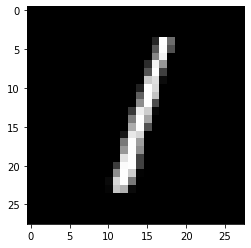

In [17]:
print("Predicted class:",np.argmax(model.predict(test_data[[2],:]),axis = -1))
plt.imshow(test_images[2,:,:],cmap='gray')

### Tanh activation function prediction inference.
Failed to predict the correct class.

Predicted class: [1]


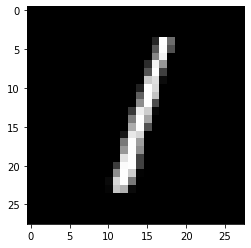

In [18]:
print("Predicted class:",np.argmax(model1.predict(test_data[[2],:]),axis = -1))
plt.imshow(test_images[2,:,:],cmap='gray')

## Bonus point (10%):
## 1. Change the loss method to (sparce categorical cross entropy).
    a. For this part you need to explain WHY you encountered an error and what you did to overcome this.
    Ans: ValueError: `logits` and `labels` must have the same shape, received ((None, 10) vs (None, 1)).
    
    Sparse Categorical Cross Entropy only works when the target is one Dimension. In this multi-classification problem, we         have one-hot encoded the target variable, and hence  Sparse Categorical Cross Entropy doesn't work.
   
    Error occured due to the shape of the lables, we should categorize the labels to 10 as we have 10 classes to identify in       the last layer. Hence, code is run without converting the target variable to one-hot encoding, thereby maintaining the         one dimension shape. 


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
slhistory = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0212 - val_accuracy: 0.9842
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 5.6335e-04 - accuracy: 0.9998 - val_loss: 0.0226 - val_accuracy: 0.9852
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 2.6205e-04 - accuracy: 0.9999 - val_loss: 0.0228 - val_accuracy: 0.9849
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 2.5108e-04 - accuracy: 0.9999 - val_loss: 0.0234 - val_accuracy: 0.9853
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 1.9008e-04 - accuracy: 0.9999 - val_loss: 0.0245 - val_accuracy: 0.9845
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 2.4833e-04 - accuracy: 0.9999 - val_loss: 0.0254 - val_accuracy: 0.9845
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 2.1560e-04 - accuracy: 0.9999 - val_loss: 0.0280 - v

In [20]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 5ms/step - loss: 0.0327 - accuracy: 0.9860
Evaluation result on Test Data : Loss = 0.0326705127954483, accuracy = 0.9860000014305115


## 2. Use a method (from NumPy) to print the correct class from the model prediction.

Predicted class: [1]


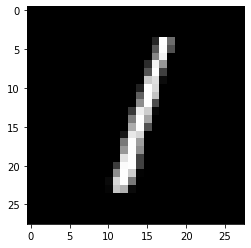

In [21]:
print("Predicted class:",np.argmax(model.predict(test_data[[2],:]),axis = -1))
plt.imshow(test_images[2,:,:],cmap='gray')